# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING DATASET

In [2]:
dataset = pd.read_csv("/content/delivery_time.csv")

In [3]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [6]:
dataset.columns = ['DeliveryTime', 'SortingTime']

In [7]:
dataset.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [8]:
dataset.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#INDEPENDENT AND DEPENDENT VARIABLES

In [9]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 0].values

In [10]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [11]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

#SPLITTING THE DATASET

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [13]:
X_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [14]:
X_test

array([10,  3,  5,  4,  4])

In [15]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [16]:
y_train

array([19.83, 12.03,  8.  , 19.  , 17.83, 29.  , 19.75, 15.35, 13.75,
       18.75,  9.5 , 18.11, 24.  , 21.  , 14.88, 16.68])

In [17]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# ML ALGORITHMS - SIMPLELINEARREGRESSION

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
#Predicting the test 
y_pred = regressor.predict(X_test)

In [20]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [21]:
y_pred

array([23.97793478, 10.70456522, 14.49695652, 12.60076087, 12.60076087])

#FOR MEASURING THE ACCURACY

In [22]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred= y_pred)

#squared True returns MSE  values, False returns RMSE values
mse = mean_squared_error(y_true = y_test, y_pred= y_pred) #default = True
rmse = mean_squared_error(y_true = y_test, y_pred= y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred= y_pred)
rsquare = r2_score(y_true = y_test, y_pred= y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 3.3252826086956517
MSE: 18.170114496691873
RMSE: 4.262641727461021
MAPE: 0.19464294628347842
Adj.Rsquare: -0.09171780724674217


#DATA VISUALISATION

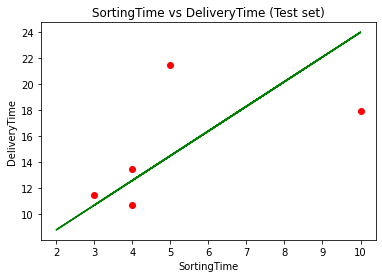

In [23]:
# Visualizing the test set results
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('SortingTime vs DeliveryTime (Test set)')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
plt.show()

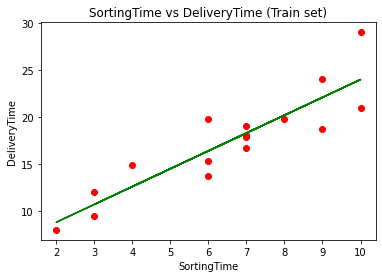

In [24]:
#Visualizing the train set results
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('SortingTime vs DeliveryTime (Train set)')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
plt.show()

#PREDICTION FOR A NEW DATAPOINT

In [25]:
newdata = pd.Series([4, 9])
data_pred = pd.DataFrame(newdata, columns= ['Sorting Time'])

In [26]:
data_pred

,Sorting Time
0,4
1,9


In [27]:
regressor.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([12.60076087, 22.08173913])

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

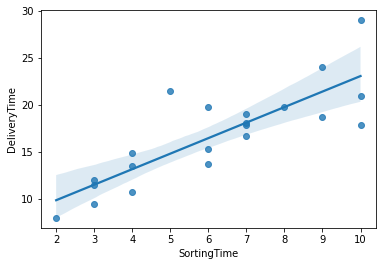

In [28]:
sns.regplot(x=dataset['SortingTime'],y=dataset['DeliveryTime'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

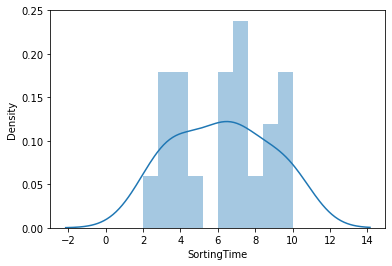

In [29]:
sns.distplot(dataset['SortingTime'], kde = True, bins = 10)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

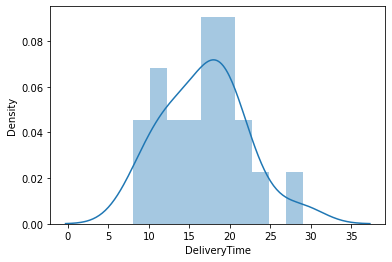

In [30]:
sns.distplot(dataset['DeliveryTime'], kde = True, bins = 10)

# TRANSFORMATIONS

In [31]:
data_log = np.log(dataset.iloc[:, 1])

In [32]:
data_log

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: SortingTime, dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

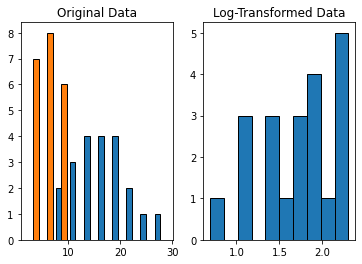

In [33]:
# define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

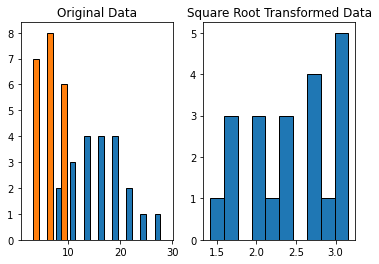

In [34]:
#create square root log-transformed data
data_sqrt = np.sqrt(dataset.iloc[:, 1])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

Text(0.5, 1.0, 'Cube Root Transformed Data')

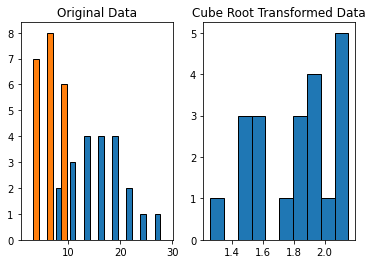

In [35]:
#create cube root log-transformed data
data_cbrt = np.cbrt(dataset.iloc[:, 1])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_cbrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Exp Transformed Data')

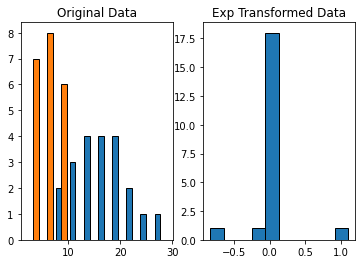

In [36]:
#Exp transofrmation

exp = np.polyfit(X, np.log(dataset.iloc[:,1]),deg = 20)
exp

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(exp, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Exp Transformed Data')

Text(0.5, 1.0, 'Cox Transformed Data')

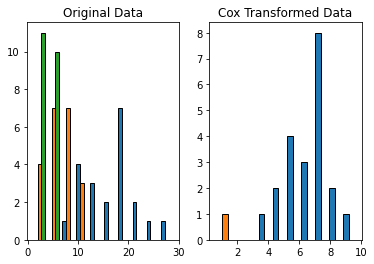

In [37]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
dataset.insert(len(dataset.columns), 'A_Boxcox', 
             boxcox(dataset.iloc[:, 1])[0])
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(boxcox(dataset.iloc[:, 0]), edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cox Transformed Data')

Text(0.5, 1.0, 'Square Transformed Data')

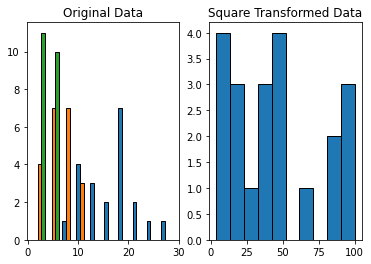

In [38]:
#Sq Transformation in Python
data_sq = dataset.iloc[:,1]**2
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_sq, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Transformed Data')